# Adventure_works_EDA
IMPORT_LIBRARIES

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from itertools import combinations
import plotly.figure_factory as ff
import plotly.express as px
import datetime as dt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import urllib.request

# DATA WRANGLING

In [2]:
# data wranglin
customers_data=pd.read_excel("/content/AdventureWorks_Database.xlsx",
                             "Customers",
                             dtype={'CustomerKey':str},
                             parse_dates=['BirthDate','DateFirstPurchase']
                             )
product_data = pd.read_excel('/content/AdventureWorks_Database.xlsx',
                              'Product',
                              dtype={'ProductKey':str},
                              parse_dates=['StartDate']
                              )
Sales_data = pd.read_excel('/content/AdventureWorks_Database.xlsx',
                              'Sales',
                              dtype={'ProductKey':str,
                                     'CustomerKey':str,
                                     'PromotionKey':str,
                                     'SalesTerritoryKey':str},
                              parse_dates=['OrderDate', 'ShipDate']
                              )
Sales_data['DateKey'] = Sales_data['OrderDate'].astype(str)
Territory_data = pd.read_excel('/content/AdventureWorks_Database.xlsx',
                              'Territory',
                              dtype={'SalesTerritoryKey':str}
                              )

In [3]:
customers_data

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,Bachelors,Professional,1,0,3761 N. 14th St,2014-01-22,1-2 Miles
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,Bachelors,Professional,0,1,2243 W St.,2014-01-18,0-1 Miles
2,11002,Ruben,Torres,"Torres, Ruben",1965-08-12,M,M,60000,3,3,Bachelors,Professional,1,1,5844 Linden Land,2014-01-10,2-5 Miles
3,11003,Christy,Zhu,"Zhu, Christy",1968-02-15,S,F,70000,0,0,Bachelors,Professional,0,1,1825 Village Pl.,2014-01-01,5-10 Miles
4,11004,Elizabeth,Johnson,"Johnson, Elizabeth",1968-08-08,S,F,80000,5,5,Bachelors,Professional,1,4,7553 Harness Circle,2014-01-26,1-2 Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,Tommy,Tang,"Tang, Tommy",1958-07-04,M,M,30000,1,0,Graduate Degree,Clerical,1,0,"111, rue Maillard",2015-09-08,0-1 Miles
18480,29480,Nina,Raji,"Raji, Nina",1960-11-10,S,F,30000,3,0,Graduate Degree,Clerical,1,0,9 Katherine Drive,2016-07-18,0-1 Miles
18481,29481,Ivan,Suri,"Suri, Ivan",1960-01-05,S,M,30000,3,0,Graduate Degree,Clerical,0,0,Knaackstr 4,2014-08-13,0-1 Miles
18482,29482,Clayton,Zhang,"Zhang, Clayton",1959-03-05,M,M,30000,3,0,Bachelors,Clerical,1,0,"1080, quai de Grenelle",2015-09-22,0-1 Miles


In [4]:
product_data

,ProductKey,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate
0,1,Adjustable Race,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
1,2,Bearing Ball,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
2,3,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
3,4,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
4,5,Blade,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,602,ML Bottom Bracket,Bottom Brackets,Components,44.9506,NaN,101.24,1,NaN,ML Bottom Bracket,http://www.avising.com/me/LearnPBI/DataSources...,Aluminum alloy cups; large diameter spindle.,2007-07-01
602,603,HL Bottom Bracket,Bottom Brackets,Components,53.9416,NaN,121.49,1,NaN,HL Bottom Bracket,http://www.avising.com/me/LearnPBI/DataSources...,Aluminum alloy cups and a hollow axle.,2007-07-01
603,604,"Road-750 Black, 44",Road Bikes,Bikes,343.6496,Black,539.99,4,Road,Road-750,http://www.avising.com/me/LearnPBI/DataSources...,Entry level adult bike; offers a comfortable r...,2007-07-01
604,605,"Road-750 Black, 48",Road Bikes,Bikes,343.6496,Black,539.99,4,Road,Road-750,http://www.avising.com/me/LearnPBI/DataSources...,Entry level adult bike; offers a comfortable r...,2007-07-01


In [5]:
Sales_data

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,StandardCost,List Price,Unnamed: 22,diif std cost,diff list price,DateKey
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,0.0,NaN,-764.3184,NaN,2171.2942,3578.2700,NaN,0,0,2014-01-01
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,...,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,...,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,0.0,NaN,-127.1944,NaN,413.1463,699.0982,NaN,0,0,2014-01-01
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,...,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58184,561,2016-12-30,2017-01-07,13650,1,9,SO74145,1,1,2384.0700,...,0.0,NaN,902.1321,NaN,1481.9379,2384.0700,NaN,0,0,2016-12-30
58185,584,2016-12-30,2017-01-07,26916,1,9,SO74146,1,1,539.9900,...,0.0,NaN,196.3404,NaN,343.6496,539.9900,NaN,0,0,2016-12-30
58186,605,2016-12-30,2017-01-07,27473,1,9,SO74147,1,1,539.9900,...,0.0,NaN,196.3404,NaN,343.6496,539.9900,NaN,0,0,2016-12-30
58187,538,2016-12-30,2017-01-07,27473,1,9,SO74147,2,1,21.4900,...,0.0,NaN,13.4527,NaN,8.0373,21.4900,NaN,0,0,2016-12-30


In [6]:
Territory_data

,SalesTerritoryKey,Region,Country,Group,RegionImage
0,1,Northwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,2,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,3,Central,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,4,Southwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,5,Southeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
5,6,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
6,7,France,France,Europe,http://www.avising.com/me/LearnPBI/DataSources...
7,8,Germany,Germany,Europe,http://www.avising.com/me/LearnPBI/DataSources...
8,9,Australia,Australia,Pacific,http://www.avising.com/me/LearnPBI/DataSources...
9,10,United Kingdom,United Kingdom,Europe,http://www.avising.com/me/LearnPBI/DataSources...


# MERGING

In [7]:
temp_data = pd.merge(Sales_data, product_data, on='ProductKey', how='inner')
df = pd.merge(temp_data, customers_data, on='CustomerKey', how='inner')
df = pd.merge(df, Territory_data, on='SalesTerritoryKey', how='inner')

In [8]:
df

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,600,2016-04-16,2016-04-23,21768,1,6,SO56212,1,1,539.9900,...,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,...,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,479,2016-11-29,2016-12-05,21727,1,6,SO71614,2,1,8.9900,...,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,477,2016-11-29,2016-12-05,21727,1,6,SO71614,3,1,4.9900,...,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58184,528,2016-11-07,2016-11-14,13145,1,2,SO70064,2,1,4.9900,...,Skilled Manual,1,2,7779 Merry Drive,2016-11-07,5-10 Miles,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
58185,361,2016-11-07,2016-11-14,13145,1,2,SO70064,1,1,2294.9900,...,Skilled Manual,1,2,7779 Merry Drive,2016-11-07,5-10 Miles,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
58186,480,2016-11-07,2016-11-14,13145,1,2,SO70064,4,1,2.2900,...,Skilled Manual,1,2,7779 Merry Drive,2016-11-07,5-10 Miles,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
58187,530,2016-02-06,2016-02-13,27040,1,2,SO52124,1,1,4.9900,...,Clerical,1,2,371 Westwood Court,2016-02-06,1-2 Miles,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...


# Describing

In [9]:
df.shape
#58189 rows
# 58 col

(58189, 58)

# REMOVING UNNECESSARY COLUMNS

In [10]:
col=["Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 22","StandardCost_x","List Price","diif std cost","diff list price"]
df.drop(columns=col,axis=1,inplace=True)

# CHECKING AGAIN

In [11]:
df.shape
#58189 rows
#46 col

(58189, 46)

In [12]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
OrderDate,58189,2016-06-03 03:56:09.605939200,2014-01-01 00:00:00,2016-04-01 00:00:00,2016-07-07 00:00:00,2016-10-10 00:00:00,2016-12-30 00:00:00,NaN
ShipDate,58189,2016-06-10 04:03:24.657237760,2014-01-08 00:00:00,2016-04-08 00:00:00,2016-07-14 00:00:00,2016-10-17 00:00:00,2017-01-07 00:00:00,NaN
SalesOrderLineNumber,58189.0,1.887453,1.0,1.0,2.0,2.0,8.0,1.018829
OrderQuantity,58189.0,1.569386,1.0,1.0,1.0,2.0,4.0,1.047532
UnitPrice,58189.0,413.888218,0.5725,4.99,24.49,269.995,3578.27,833.052938
TotalProductCost,58189.0,296.539185,0.8565,3.3623,12.1924,343.6496,2171.2942,560.171436
SalesAmount,58189.0,503.66627,2.29,8.99,32.6,539.99,3578.27,941.462817
TaxAmt,58189.0,40.293303,0.1832,0.7192,2.608,43.1992,286.2616,75.317027
StandardCost_y,58189.0,296.539185,0.8565,3.3623,12.1924,343.6496,2171.2942,560.171436
ListPrice,58189.0,503.66627,2.29,8.99,32.6,539.99,3578.27,941.462817


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  object        
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  object        
 4   PromotionKey          58189 non-null  object        
 5   SalesTerritoryKey     58189 non-null  object        
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  DateKey         

In [14]:
df = df.rename(columns={'StandardCost_y': 'StandardCost'}) # renaming

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  object        
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  object        
 4   PromotionKey          58189 non-null  object        
 5   SalesTerritoryKey     58189 non-null  object        
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  DateKey         

# HANDLING MISSING DATA
CALCULATING MISSING PERCENT IN EACH COLUMN TO CHECK WHETHER DROPPING MISSING VALUES AFFECT IN FUTURE OR NOT

In [16]:
missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
missing_count_percent

ProductKey               0.000000
OrderDate                0.000000
ShipDate                 0.000000
CustomerKey              0.000000
PromotionKey             0.000000
SalesTerritoryKey        0.000000
SalesOrderNumber         0.000000
SalesOrderLineNumber     0.000000
OrderQuantity            0.000000
UnitPrice                0.000000
TotalProductCost         0.000000
SalesAmount              0.000000
TaxAmt                   0.000000
DateKey                  0.000000
ProductName              0.000000
SubCategory              0.000000
Category                 0.000000
StandardCost             0.000000
Color                   47.160116
ListPrice                0.000000
DaysToManufacture        0.000000
ProductLine              0.000000
ModelName                0.000000
Photo                    0.000000
ProductDescription       0.000000
StartDate                0.000000
FirstName                0.000000
LastName                 0.000000
FullName                 0.000000
BirthDate     

In [17]:
df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
df_missing_count_percent

,0
ProductKey,0.00
OrderDate,0.00
ShipDate,0.00
CustomerKey,0.00
PromotionKey,0.00
SalesTerritoryKey,0.00
SalesOrderNumber,0.00
SalesOrderLineNumber,0.00
OrderQuantity,0.00
UnitPrice,0.00


FROM THE ABOVE WE CAN KNOW NONE OF THE COLUMN EXCEEDS 50% . SO we can drop

In [18]:
#  Drop columns with nan values
df= df.dropna(axis=1)

# ADDING SOME ADDITIONAL COLUMNS

In [19]:
# Extracting Year from OrderDate
df['sale_year'] = df['OrderDate'].dt.year

# Extracting Month from OrderDate
df['sale_month'] = df['OrderDate'].dt.month

# Extracting day from OrderDate
df['sale_day'] = df['OrderDate'].dt.day

# Extracting dayofweek from OrderDate
df['sale_week'] = df['OrderDate'].dt.dayofweek

# Extracting day_name from OrderDate
df['sale_day_name'] = df['OrderDate'].dt.day_name()

# Extracting Month Year from OrderDate
df['year_month'] = df['OrderDate'].apply(lambda x:x.strftime('%Y-%m'))

# Calculate Total Invoice Amount
df['total_Invoice_amount'] = df['SalesAmount'] + df['TaxAmt']

# Considering only salesamount and total_sales_amount to calculate profit
df['profit'] = (df['UnitPrice']*df['OrderQuantity']) - df['TotalProductCost']

# Removing extra character from the string
df['ProductName'] = df['ProductName'].str.replace(',','-')

# Calculate Age
df['Age'] = df['OrderDate'].dt.year - df['BirthDate'].dt.year

# EDA
1. list the product's categories

In [20]:
df['Category'].unique().tolist()

['Bikes', 'Accessories', 'Clothing']

2. List of product's sub category

In [21]:
df['SubCategory'].unique().tolist()

['Road Bikes',
 'Mountain Bikes',
 'Bottles and Cages',
 'Gloves',
 'Tires and Tubes',
 'Helmets',
 'Touring Bikes',
 'Jerseys',
 'Cleaners',
 'Caps',
 'Hydration Packs',
 'Socks',
 'Fenders',
 'Vests',
 'Bike Racks',
 'Bike Stands',
 'Shorts']

In [22]:
df

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,RegionImage,sale_year,sale_month,sale_day,sale_week,sale_day_name,year_month,total_Invoice_amount,profit,Age
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,1,2,Wednesday,2014-01,3864.5316,1406.9758,68
1,600,2016-04-16,2016-04-23,21768,1,6,SO56212,1,1,539.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,4,16,5,Saturday,2016-04,583.1892,245.4103,70
2,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,...,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,30,3,Thursday,2014-01,3864.5316,1406.9758,41
3,479,2016-11-29,2016-12-05,21727,1,6,SO71614,2,1,8.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,11,29,1,Tuesday,2016-11,9.7092,5.6277,43
4,477,2016-11-29,2016-12-05,21727,1,6,SO71614,3,1,4.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,11,29,1,Tuesday,2016-11,5.3892,3.1237,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58184,528,2016-11-07,2016-11-14,13145,1,2,SO70064,2,1,4.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,11,7,0,Monday,2016-11,5.3892,3.1237,40
58185,361,2016-11-07,2016-11-14,13145,1,2,SO70064,1,1,2294.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,11,7,0,Monday,2016-11,2478.5892,1043.0087,40
58186,480,2016-11-07,2016-11-14,13145,1,2,SO70064,4,1,2.2900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,11,7,0,Monday,2016-11,2.4732,1.4335,40
58187,530,2016-02-06,2016-02-13,27040,1,2,SO52124,1,1,4.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,2,6,5,Saturday,2016-02,5.3892,3.1237,59


3. ANALYSING UNIT PRICE

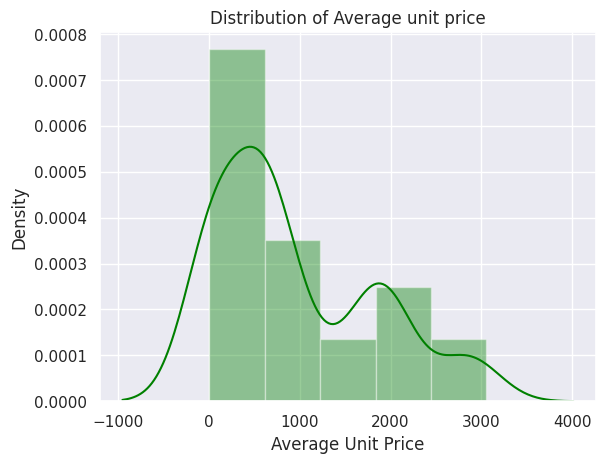

In [24]:
Avg_unit_price = df.groupby(['ProductKey'])['UnitPrice'].mean()
aup = sns.distplot(Avg_unit_price, kde=True, hist=True, color='green')
aup.set(title='Distribution of Average unit price',
       xlabel='Average Unit Price');

FROM THE ABOVE GRAPH WE KNOW THAT , FOR THE MAXIMUM PRODUCT , UNIT PRICE IS BELOW 100$

4. SALES ORDER NUMBER DISTIBUTION

In [25]:
n_orders = df.groupby(['CustomerKey'])['SalesOrderNumber'].nunique()
multi_orders_perc = np.sum(n_orders > 1)/df['CustomerKey'].nunique()
print(f"{100*multi_orders_perc:.2f}% of customers ordered more than once.")

36.97% of customers ordered more than once.


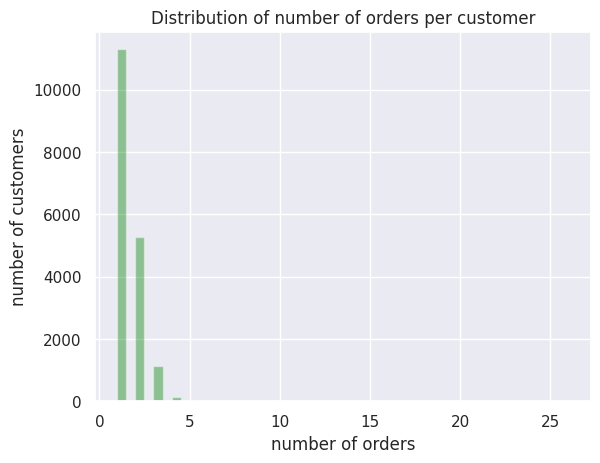

In [27]:
ax = sns.distplot(n_orders, kde=False, color='green')
ax.set(title='Distribution of number of orders per customer',
       xlabel='number of orders',
       ylabel='number of customers');

5 . SALES ORDER QUANTITY DISTRIBUTION

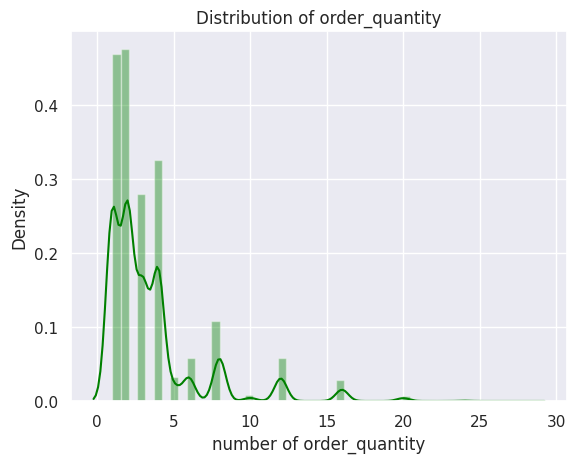

In [28]:
n_order_quantity = df.groupby(['SalesOrderNumber'])['OrderQuantity'].sum()
ax = sns.distplot(n_order_quantity, kde=True, hist=True,color='green')
ax.set(title='Distribution of order_quantity',
       xlabel='number of order_quantity',
       );

MAXIMUM ORDERED QUANTITY IS BELOW 5

6 . AGE DISTIBUTION

In [30]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

age_distribution = df['agerange'].value_counts().to_frame().reset_index()

age_distribution.columns = ['Age Range','Population count']

fig = px.bar(age_distribution, x='Age Range', y='Population count', color_discrete_sequence=['green'])
fig.update_layout(
    autosize=True,
    width=500,
    height=500,
    font=dict(size=10))
fig.show()

A sizable portion of the clientele is made up of people between the ages of 40 and 59.

# SALES

7 . YEAR WISE SALES DISTRIBUTION

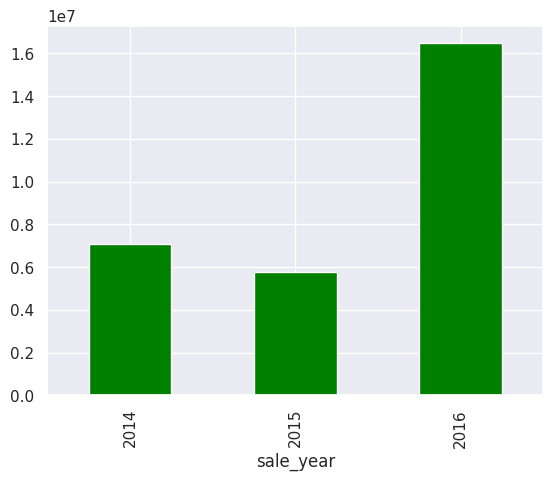

In [32]:
df.groupby('sale_year')['SalesAmount'].sum().plot(kind='bar', color='green');

The year 2016 saw an exponential surge in sales

8 . TOP 5 SELLING PRODUCT

In [33]:
top_selling_product = df.groupby(['Category', 'SubCategory', 'ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame()
top_selling_product

OrderQuantity
Category    SubCategory       ProductName                         
Accessories Bottles and Cages Water Bottle - 30 oz.           6370
            Tires and Tubes   Patch Kit/8 Patches             4705
                              Mountain Tire Tube              4551
                              Road Tire Tube                  3544
            Helmets           Sport-100 Helmet- Red           3398

In [35]:
top_selling_product.reset_index(inplace=True)
fig = px.bar(top_selling_product, x='ProductName', y='OrderQuantity',color_discrete_sequence=['green'])
fig.update_layout(
    autosize=True,
    width=500,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=8))
fig.show()

9. Quantity ordered based on category and subcategory from 2014 to 2016

In [39]:
cat_subcat_qty = df.groupby(['sale_year','Category', 'SubCategory'])['OrderQuantity'].sum().to_frame()
cat_subcat_qty = cat_subcat_qty.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_qty.style.bar(subset=['OrderQuantity'], color='#D9B300')

10. COUNTRY WISE ORDERED

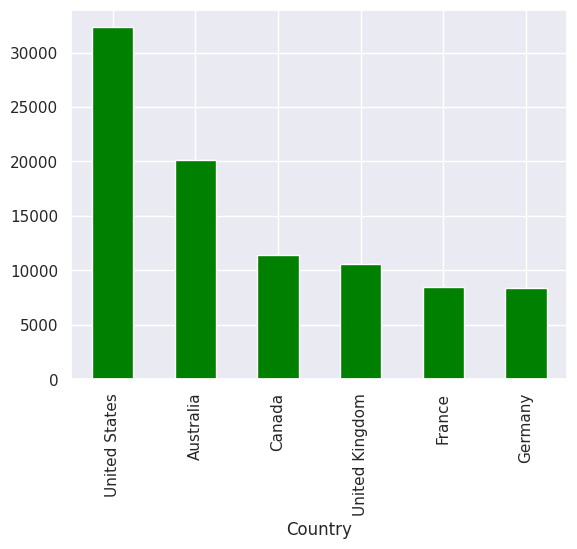

In [37]:
country_qty_sales = df.groupby('Country')['OrderQuantity'].sum().sort_values(ascending=False)
country_qty_sales.plot(kind='bar', color='green');

AUSTRALIA AND US HAS ORDERED IN HIGH QUANTITIES

# PROFIT

11. Overall profit based on order year, category and subcategory

In [40]:
cat_subcat_profit = df.groupby(['sale_year','Category', 'SubCategory'])['profit'].sum().to_frame()

#Sorting the results
cat_subcat_profit = cat_subcat_profit.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_profit.style.bar(subset=['profit'], color='#D9B300')

BIKES CATEGORY CONTRIBUTED MAXIMUM PROFIT

12 . LOW PROFIT CONTRIBUTED PRODUCT

In [41]:
 df.groupby(['Category', 'SubCategory','ProductName'])['profit'].sum().nsmallest(10).to_frame()

profit
Category    SubCategory     ProductName                              
Clothing    Socks           Racing Socks- L                 1474.4574
                            Racing Socks- M                 1581.3837
Accessories Cleaners        Bike Wash - Dissolver           4299.8688
            Tires and Tubes Patch Kit/8 Patches             4314.8350
Clothing    Caps            AWC Logo Cap                    4331.8315
Accessories Tires and Tubes Touring Tire Tube               4363.8089
Clothing    Jerseys         Long-Sleeve Logo Jersey- XL     4495.6007
                            Short-Sleeve Classic Jersey- L  4544.8782
                            Long-Sleeve Logo Jersey- S      4610.5777
                            Short-Sleeve Classic Jersey- M  4793.2322

PROFIT BY PRODUCT RACING SOCKS - L IS VERY LOW

13. PROFIT BY COUNTRY

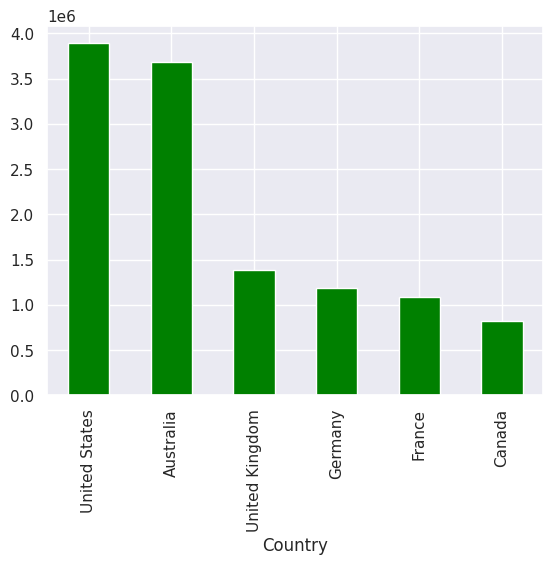

In [49]:
#PROFIT BY COUNTRY

Country_Sales = df.groupby('Country')['profit'].sum().sort_values(ascending=False)
Country_Sales.plot(kind='bar', color='green');


HIGH VALUE PROFIT IS GOT BY AUSTRALIA AND UNITED STATES

14. How efficient are the logistics?

In [51]:
# Adding manufacturing days to the order received date
df['OrderreadyDate'] = df['OrderDate'] + pd.to_timedelta(df['DaysToManufacture'], unit='D')

# Check the delay between order shipment date and order ready to supply
df['shipping_efficiency'] = (df['ShipDate'] - df['OrderreadyDate']).dt.days

fig = px.histogram(df, x="shipping_efficiency", color_discrete_sequence=['green'])
fig.update_layout(
    autosize=True,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=10))
fig.show()

The average order has a gap of 7 days between the day the order is ready for export from the factory and the date it was shipped
Management must work to reduce this gap toward 3 days.

15. WHAT WAS THE BEST MONTH FOR SALES?

In [52]:
df.groupby('sale_month')['profit'].sum().to_frame().sort_values(by='profit', ascending= False).head(3)

,profit
sale_month,
12,1.314384e+06
11,1.290573e+06
6,1.256211e+06


TOP 3 MONTHS BEST IN SALES ARE DECEMBER , NOVEMBER , JUNE

16. WHAT TIME SHOULD WE DISPLAY THE ADVERTISEMENT TO MAXIMISE THELIKELIHOOD OF CUSTOMERS BY BUYING PRODUCTS?

In [59]:
sales_by_week = df.groupby(['sale_day_name']).count()['SalesAmount'].reset_index().sort_values('SalesAmount', ascending=False)

fig = px.line(sales_by_week, x='sale_day_name', y='SalesAmount', title='Sales Frequency by week')
fig.update_layout(
    autosize=True,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=7))
fig.show()

High sales orders are seen on Wednesday and Saturday

17. WHICH PRODUCTS ARE OFTEN SOLD TOGETHER ?

In [60]:
# By setting keep on False, all duplicates are True since we only want repeated order number
dup_order = df[df['SalesOrderNumber'].duplicated(keep=False)]

In [61]:
# Group the data based on sales order number and product name because the products
# that bought together will have share same order number
dup_order['grouped'] = df.groupby('SalesOrderNumber')['ProductName'].transform(lambda x: ','.join(x))
dup_order = dup_order[['SalesOrderNumber', 'grouped']].drop_duplicates()

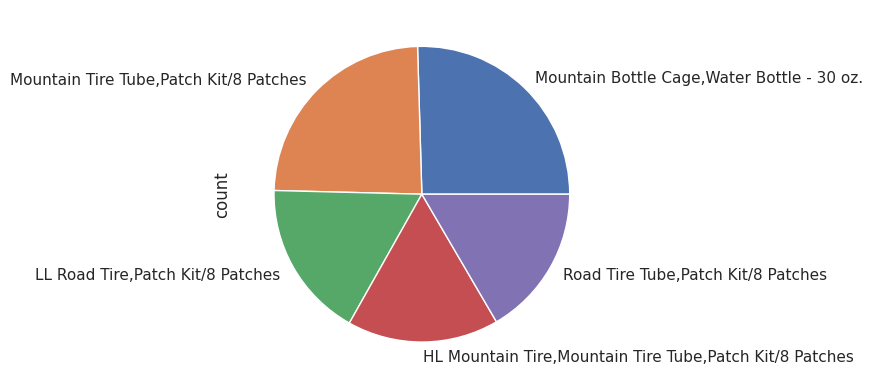

In [62]:
count = dup_order['grouped'].value_counts()[0:5].plot.pie()

From the above pie diagram we can draw a conclusion that these products are mostly Purchased together

In [63]:
count = Counter()

for row in dup_order['grouped']:
    row_list  = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('Mountain Bottle Cage', 'Water Bottle - 30 oz.') 1623
('Road Bottle Cage', 'Water Bottle - 30 oz.') 1513
('HL Mountain Tire', 'Mountain Tire Tube') 915
('Touring Tire', 'Touring Tire Tube') 758
('Mountain Tire Tube', 'Patch Kit/8 Patches') 737
('Mountain Tire Tube', 'ML Mountain Tire') 727
('Water Bottle - 30 oz.', 'AWC Logo Cap') 599
('Road Tire Tube', 'ML Road Tire') 580
('Road Tire Tube', 'Patch Kit/8 Patches') 556
('HL Road Tire', 'Road Tire Tube') 552


18. WHICH PRODUCT SOLD THE MOST?

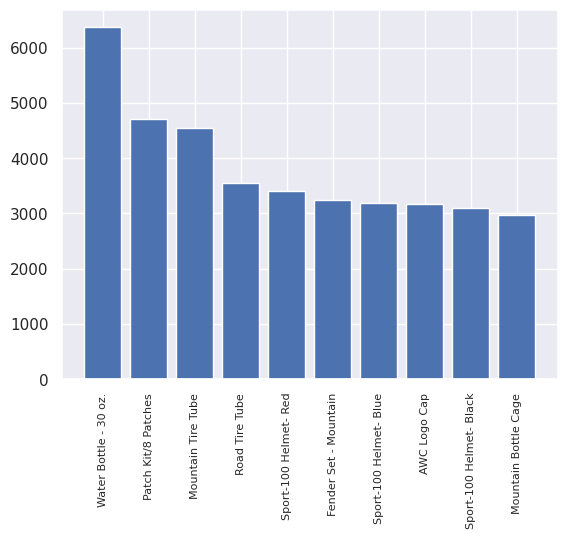

In [64]:
product_group = df.groupby('ProductName')
quantity_ordered = product_group['OrderQuantity'].sum().sort_values(ascending=False)[:10]
products = quantity_ordered.index.tolist()

plt.bar(products, quantity_ordered, )
plt.xticks(products, rotation='vertical', size=8)
plt.show()

WATER BOTTLE HAD SOLD THE MOST

In [69]:
prices = df.groupby('ProductName')['UnitPrice'].mean() # Calculate the average unit price for each product
prices = prices[products]

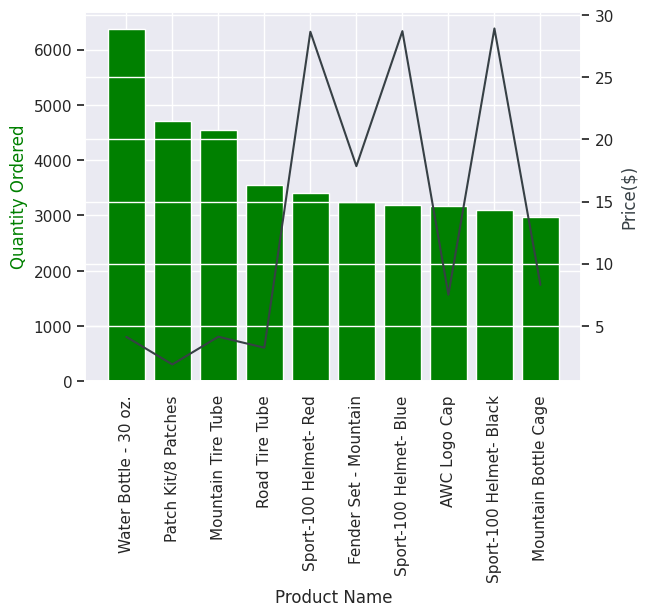

In [71]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='green')
ax2.plot(products, prices, '#374045')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='green')
ax2.set_ylabel('Price($)', color='#374045')
ax1.set_xticklabels(products, rotation='vertical')

plt.show();

In [72]:
prices.corr(quantity_ordered)

-0.5333019792658484

- There is a **high negative correlation** between **Price and number of Quantity ordered**
- we can conclude that **low price product has high demand**

19. Compare most ordered product by gender

In [73]:
male = df[df["Gender"]=="M"]
female = df[df["Gender"]=="F"]

In [74]:
male_ord_qty = male.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
male_ord_qty.columns=['ProductName','Order_Qty_Male']

female_ord_qty = female.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
female_ord_qty.columns=['ProductName','Order_Qty_Female']

df_merge = pd.merge(male_ord_qty, female_ord_qty, on='ProductName')

In [75]:
fig = px.line(df_merge, x="ProductName", y=["Order_Qty_Male","Order_Qty_Female"])
fig.update_layout(
    autosize=True,
    width=800,
    height=400)
fig.show()

20 Does Gender and home ownership matter in order purchasing

In [76]:
fig = px.imshow(df.groupby(["Gender", "HouseOwnerFlag"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.show()

It's interesting to note that the average amount spent by men without permanent addresses is low, whilst the average amount spent by women without permanent addresses is higher.

21 Number of childer and Purchase correlation

In [78]:
df_1 = df.groupby(["NumberChildrenAtHome"])["SalesAmount"].mean().to_frame()
df_1.reset_index(inplace=True)
fig = px.bar(df_1, x='NumberChildrenAtHome', y='SalesAmount',color_discrete_sequence=['green'])
fig.update_layout(
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

22 Education, Occupation and Purchase correlation

In [79]:
fig = px.imshow(df.groupby(["Education", "Occupation"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.show()

23. Which age group has produced the most revenue?

In [81]:
df_3 = df.groupby('agerange')['SalesAmount'].mean().to_frame().dropna()
df_3.reset_index(inplace=True)
fig = px.bar(df_3, x='agerange', y='SalesAmount', color_discrete_sequence=['green'])
fig.update_layout(
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

24 YEAR INCOME RANGE AND PURCHASE CORRELATION

In [82]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning.
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """


    bins = []
    for low in range(lower_bound,
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [83]:
bins = create_bins(lower_bound=10000,
                   width=30000,
                   quantity=5)
bins2 = pd.IntervalIndex.from_tuples(bins)
df['salary_range'] = pd.cut(df['YearlyIncome'], bins2)

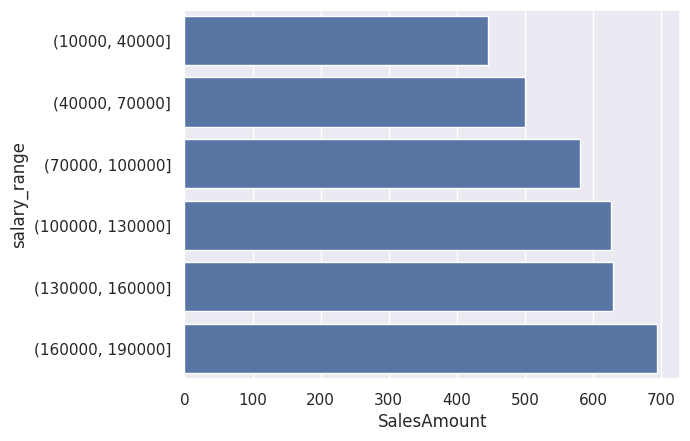

In [84]:
df_4 = df.groupby('salary_range')['SalesAmount'].mean().to_frame()
df_4.reset_index(inplace=True)
sns.barplot(x="SalesAmount", y="salary_range", data=df_4);

when salary range is high , purchase is also high

25. Paritial high school vs bachlors income mean and most ordered product

In [85]:
df_6 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')].groupby('Education')['YearlyIncome'].mean().to_frame()

In [86]:
df_6.reset_index(inplace=True)
fig = px.bar(df_6, x='Education', y='YearlyIncome')
fig.update_layout(
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

In [87]:
df_7 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')]
df_7 = df_7.groupby(['Education','ProductName'])['OrderQuantity'].mean().to_frame().sort_values('OrderQuantity', ascending=False)[:10]
df_7.reset_index(inplace=True)
fig = px.bar(df_7, x="Education",
             y="OrderQuantity", color="ProductName",
             title="Paritial high school vs bachlors expense analysis",
             barmode="group")
fig.show()

Customers with a **high school diploma and modest annual income buy more products** than people with bachelor's degrees

CUSTOMER SEGMENTATION

In [88]:
# RFM stands for recency, frequency, monetary value.
#  In business analytics, we often use this concept to divide
#  customers into different segments, like high-value customers,
#  medium value customers or low-value customers, and similarly many others.

In [89]:
# Recency: How recently has the customer made a transaction with us
# Frequency: How frequent is the customer in ordering/buying some product from us
# Monetary: How much does the customer spend on purchasing products from us

In [90]:
#  calculating recency for customers who had made a purchase with a company

df_recency = df.groupby(by='FullName',
                        as_index=False)['OrderDate'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)

In [91]:
#  calculating the frequency of frequent transactions of the
#  customer in ordering/buying some product from the company.


frequency_df = df.drop_duplicates().groupby(
    by=['FullName'], as_index=False)['OrderDate'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
# frequency_df.head()

In [92]:
monetary_df = df.groupby(by='FullName', as_index=False)['SalesAmount'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
# monetary_df.head()

In [93]:
# merging dataset
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
# rfm_df.head()

In [94]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

# rfm_df.head()

In [95]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
# rfm_df[['CustomerName', 'RFM_Score']].head(7)

In [96]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
# rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

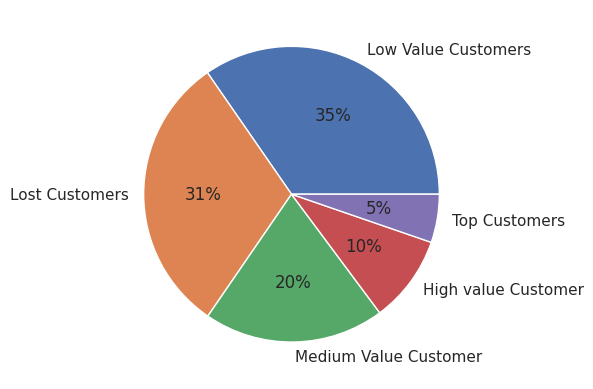

In [97]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

- According to the customer segmentation described above, approximately **15% of our clients are high value clients**, whereas the **majority of our clientele are low value and lost clients**

COHORT ANALYSIS

In [98]:
# create an invoice month

# Function for month
def get_month(x):
  return dt.datetime(x.year, x.month,1)

# apply the function
df['InvoiceMonth'] = df['OrderDate'].apply(get_month)
# create a column index with the minimum invoice date aka first time customer was aquired
df['CohortMonth'] = df.groupby('CustomerKey')['InvoiceMonth'].transform('min')

In [99]:
# create a date element function to get a series for subtranction
def get_date_elements(data,column):
  day = data[column].dt.day
  month = data[column].dt.month
  year = data[column].dt.year
  return day, month, year

In [100]:
# get date elements for our cohort and invoice columns(one dimentional Series)
_, Invoice_month, Invoice_year = get_date_elements(df, 'InvoiceMonth')
_, Cohort_month, Cohort_year = get_date_elements(df, 'CohortMonth')

# create a cohort index
year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1

# count the customer ID by grouping by Cohort Month and Cohort index
cohort_data = df.groupby(['CohortMonth','CohortIndex'])['CustomerKey'].apply(pd.Series.nunique).reset_index()

# create pivot table
cohort_table = cohort_data.pivot(index='CohortMonth', columns=['CohortIndex'],values='CustomerKey')

# change index
cohort_table.index = cohort_table.index.strftime('%B %Y')

# cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)

<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

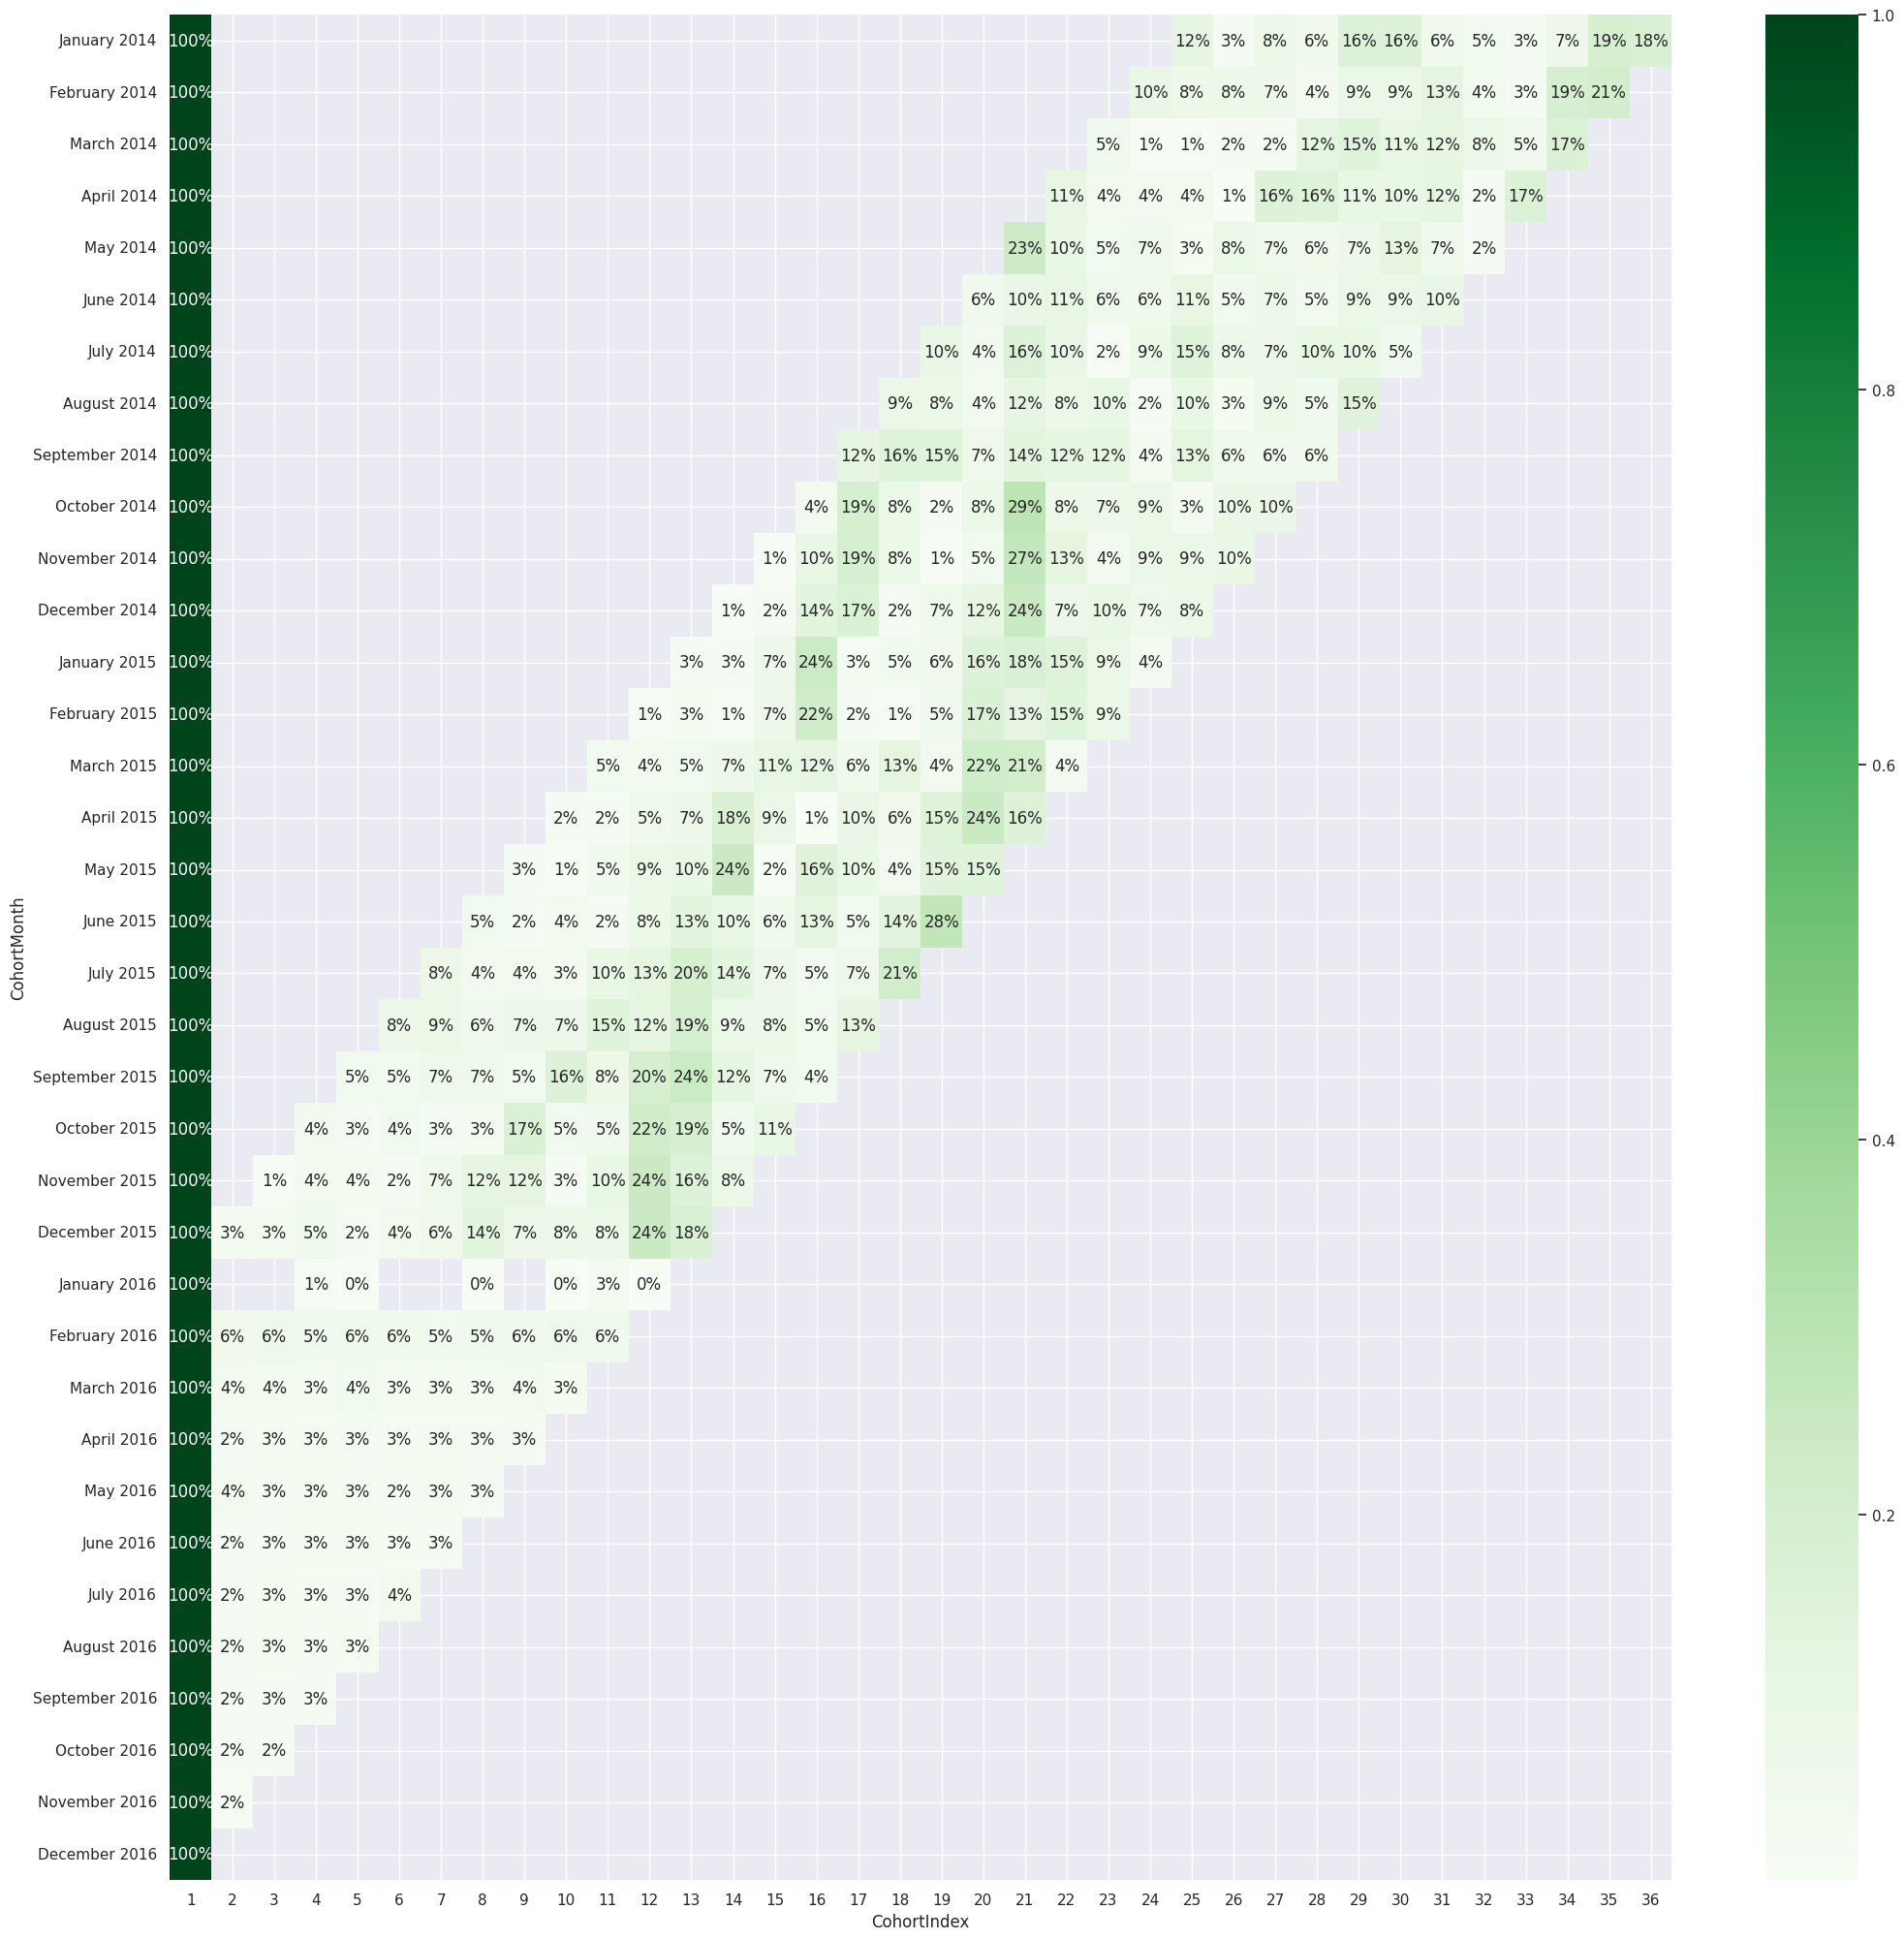

In [106]:
# create percentages

plt.figure(figsize=(25,25))
sns.heatmap(new_cohort_table, annot=True, cmap='Greens',fmt='.0%')


- We can infer from the heatmap above that client retention in 2014 was subpar
- Since August of 2015, we have noticed some customers returning, though not in large numbers
- 2016 brought about a slight improvement in retention